<a href="https://colab.research.google.com/github/FokaKefir/KepKreator/blob/main/MNIST2_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies

In [11]:
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load in MNIST

In [12]:
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()
x_mnist_train, x_mnist_test = x_mnist_train / 255.0, x_mnist_test / 255.0

In [13]:
x_mnist_train.shape, y_mnist_train.shape

((60000, 28, 28), (60000,))

# Generate numbers with 2 digits

In [14]:
choosen_nums = 50

In [15]:
num_indexes = []
for num in range(10):
  num_indexes.append(np.random.choice(np.where(y_mnist_train == num)[0], choosen_nums, replace=False))

In [16]:
x_train = np.zeros((choosen_nums * choosen_nums * 90, 28, 2 * 28), dtype=np.float32)
y_train = np.zeros((choosen_nums * choosen_nums * 90), dtype=np.uint8)
ind = 0
for first_digit in range(1, 10):
  for last_digit in range(10):
    for f_num_index in num_indexes[first_digit]:
      first_num_matrix = x_mnist_train[f_num_index]
      for l_num_index in num_indexes[last_digit]:
        last_num_matrix = x_mnist_train[l_num_index]
        num_matrix = np.concatenate([first_num_matrix, last_num_matrix], axis=1)
        x_train[ind] = num_matrix
        y_train[ind] = 10 * first_digit + last_digit
        ind += 1

In [17]:
del x_mnist_train
del y_mnist_train
del x_mnist_test
del y_mnist_test

In [18]:
x_train, y_train = shuffle(x_train, y_train)

In [19]:
x_train.shape, y_train.shape

((225000, 28, 56), (225000,))

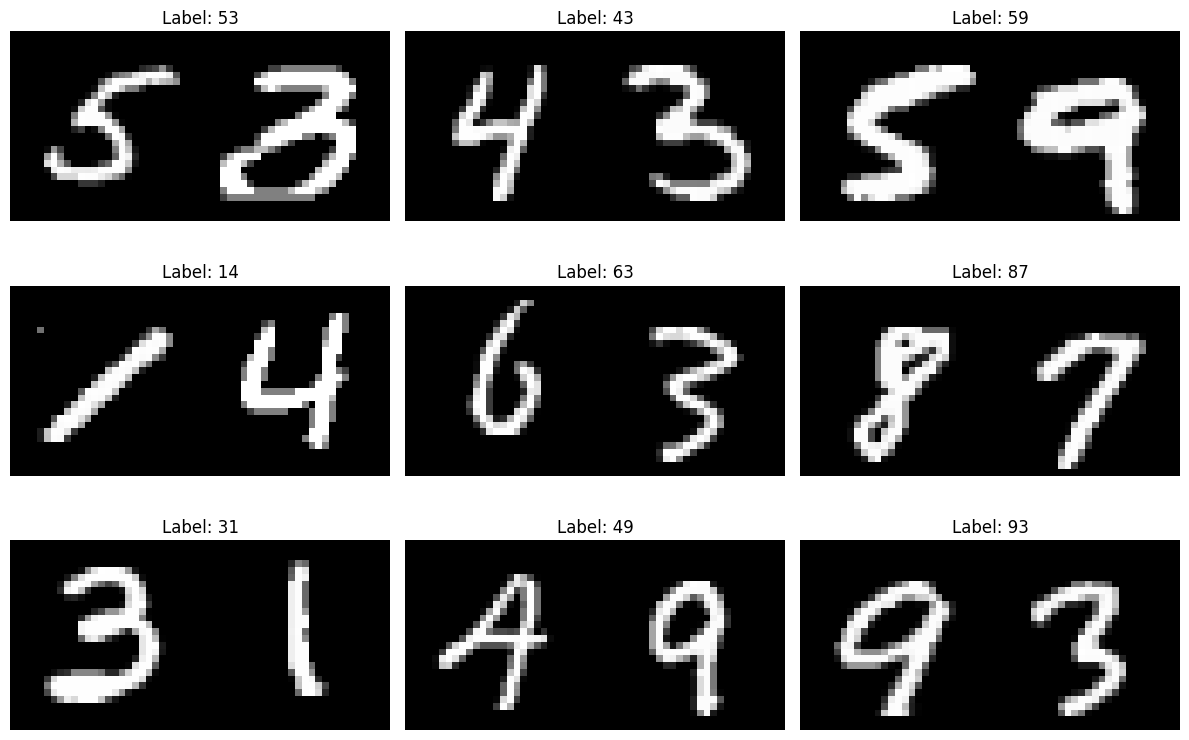

In [20]:
random_indices = np.random.choice(x_train.shape[0], 9, replace=False)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices, 1):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()